# Section 1: Data Preprocessing & Feature Engineering

In this section, we begin by importing libraries, setting display options, and mounting Google Drive to load our dataset. We then inspect the DataFrame's dimensions and preview its contents. Next, we analyze missing values across columns and decide to drop features with excessive missing data. For remaining missing values, numerical features are imputed using the median (with LotFrontage imputed by neighborhood median) and categorical features are filled with 'None' or the mode. Additionally, we create binary indicators to flag missing garage and basement information. The target variable, SalePrice, is explored using histograms and then log-transformed to normalize its distribution. New features such as HouseAge and TotalSF are engineered, and categorical features like Street, Utilities, and CentralAir are converted to binary format. Finally, a correlation analysis helps us identify and drop features with low relevance to the target variable.

In [356]:
import pandas as pd

# Set display options to show all rows
pd.set_option('display.max_rows', None)

from google.colab import drive
drive.mount('/content/drive')


# Path to CSV files
train_df = pd.read_csv('/content/drive/My Drive/Files/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [357]:
train_df.shape

(1460, 81)

In [358]:
# Show the head of the df

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [359]:
# Calculate and display the percentage of missing values
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100
print(missing_percentage)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [360]:
# Here we can already see that some features have a lot of missing values so we will drop them

train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley'], inplace=True)

In [361]:
# For LotFrontage, we use Neighborhood median to preserve location-based trends

train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [362]:
# For other numerical columns with a few missing values, fill with median

train_df.fillna({'MasVnrArea': train_df['MasVnrArea'].median(),
                 'GarageYrBlt': train_df['GarageYrBlt'].median()}, inplace=True)

In [363]:
# This code creates binary indicators (0 or 1) to track whether a property is missing a garage or basement.

train_df['Missing_Garage'] = train_df['GarageType'].isnull().astype(int)
train_df['Missing_Basement'] = train_df['BsmtQual'].isnull().astype(int)

In [364]:
# None for missing categorical values

for col in ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
            'GarageCond', 'Fence']:
  train_df[col].fillna('None', inplace=True)

<ipython-input-364-cec4fc10bc09>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna('None', inplace=True)


In [365]:
# use the most frequently occurring value in the Electrical column.
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)

<ipython-input-365-e78eb49d0b2e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)


In [366]:
# Calculate and display the percentage of missing values
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100
print(missing_percentage)

Id                  0.0
MSSubClass          0.0
MSZoning            0.0
LotFrontage         0.0
LotArea             0.0
Street              0.0
LotShape            0.0
LandContour         0.0
Utilities           0.0
LotConfig           0.0
LandSlope           0.0
Neighborhood        0.0
Condition1          0.0
Condition2          0.0
BldgType            0.0
HouseStyle          0.0
OverallQual         0.0
OverallCond         0.0
YearBuilt           0.0
YearRemodAdd        0.0
RoofStyle           0.0
RoofMatl            0.0
Exterior1st         0.0
Exterior2nd         0.0
MasVnrType          0.0
MasVnrArea          0.0
ExterQual           0.0
ExterCond           0.0
Foundation          0.0
BsmtQual            0.0
BsmtCond            0.0
BsmtExposure        0.0
BsmtFinType1        0.0
BsmtFinSF1          0.0
BsmtFinType2        0.0
BsmtFinSF2          0.0
BsmtUnfSF           0.0
TotalBsmtSF         0.0
Heating             0.0
HeatingQC           0.0
CentralAir          0.0
Electrical      

# Exploring the targer variable

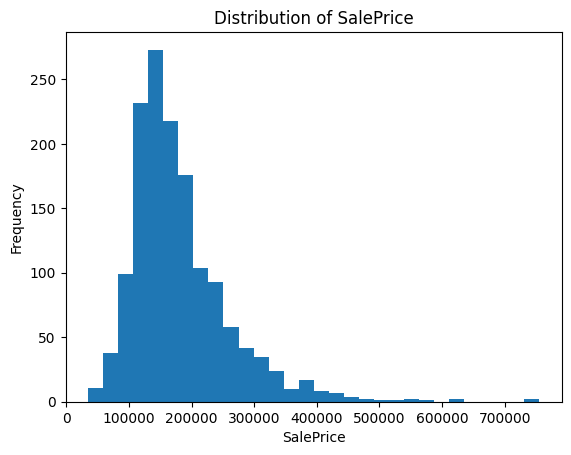

In [367]:
# Here we check the target columns which will be SalePrice to see how the values are distributed
import matplotlib.pyplot as plt

plt.hist(train_df['SalePrice'], bins=30)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.show()

In [368]:
# The log function compresses the range of values, which can help make a skewed distribution more normal
import numpy as np

train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

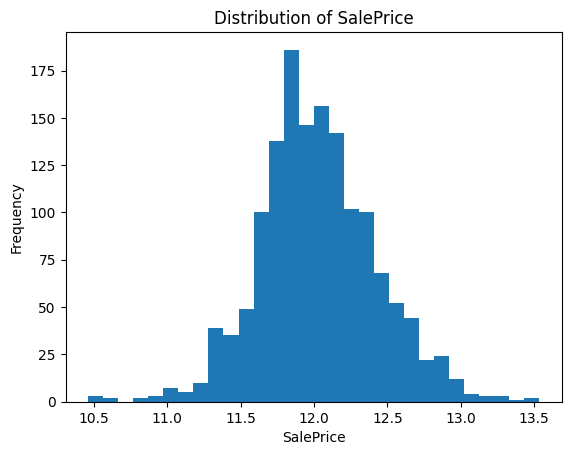

In [369]:
# Plot the distrubution after applying log

plt.hist(train_df['SalePrice'], bins=30)  # Adjust 'bins' for granularity
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.show()

# Creating new features #

In [370]:
# House age will be calculated based on 2 features

train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

In [371]:
# Total size of the property calculation

train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['TotalBsmtSF']

In [372]:
# Check for binary columns

binary_features = [col for col in train_df.columns if train_df[col].nunique() == 2]
print("Binary Features:", binary_features)

Binary Features: ['Street', 'Utilities', 'CentralAir', 'Missing_Garage', 'Missing_Basement']


In [373]:
# creating a new binary column 'HasBasement' based on whether the value in the 'TotalBsmtSF' column is greater than 0.

train_df['HasBasement'] = (train_df['TotalBsmtSF'] > 0).astype(int)

In [374]:
for col in ['Street', 'Utilities', 'CentralAir']:
    print(f"{col}: {train_df[col].unique()}")

Street: ['Pave' 'Grvl']
Utilities: ['AllPub' 'NoSeWa']
CentralAir: ['Y' 'N']


In [375]:
train_df['Street'] = (train_df['Street'] == 'Pave').astype(int)  # 1 if Paved, 0 if Gravel
train_df['Utilities'] = (train_df['Utilities'] == 'AllPub').astype(int)  # 1 if All Public, 0 otherwise
train_df['CentralAir'] = (train_df['CentralAir'] == 'Y').astype(int)  # 1 if Yes, 0 if No

In [376]:
for col in ['Street', 'Utilities', 'CentralAir','HasBasement']:
    print(f"{col}: {train_df[col].unique()}")

Street: [1 0]
Utilities: [1 0]
CentralAir: [1 0]
HasBasement: [1 0]


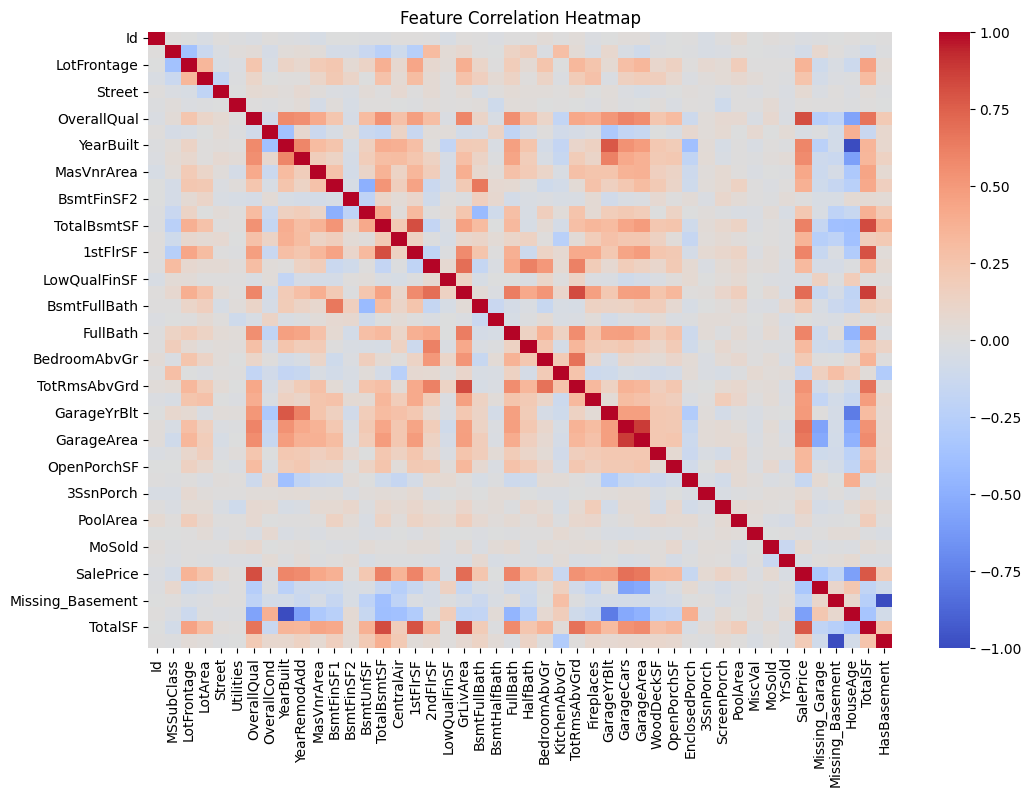

In [377]:
import seaborn as sns

# Calculate the correlation matrix
# Select only numeric features
numeric_df = train_df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [378]:
# Sort correlations with SalePrice in ascending order
corr_with_target = corr_matrix['SalePrice'].sort_values()

# Filter out features with low correlation (e.g., less than 0.3 or 0.5)
low_corr_features = corr_with_target[abs(corr_with_target) < 0.3]
print("Features with low correlation to SalePrice:")
print(low_corr_features)

Features with low correlation to SalePrice:
Missing_Basement   -0.199634
EnclosedPorch      -0.149050
KitchenAbvGr       -0.147548
MSSubClass         -0.073959
LowQualFinSF       -0.037963
YrSold             -0.037263
OverallCond        -0.036868
MiscVal            -0.020021
Id                 -0.017942
BsmtHalfBath       -0.005149
BsmtFinSF2          0.004832
Utilities           0.012632
3SsnPorch           0.054900
MoSold              0.057330
Street              0.057369
PoolArea            0.069798
ScreenPorch         0.121208
HasBasement         0.199634
BedroomAbvGr        0.209043
BsmtUnfSF           0.221985
BsmtFullBath        0.236224
LotArea             0.257320
Name: SalePrice, dtype: float64


In [379]:
drop_features = ['Id', 'LowQualFinSF', 'MSSubClass', 'MiscVal']

train_df.drop(columns=drop_features, inplace=True)

# Section 2: Model Setup & Training Preparation

Here, the dataset is split into features (X) and the target (y), with categorical variables one-hot encoded (dropping the first category to avoid multicollinearity) and numerical features standardized using StandardScaler.The data is further divided into training and testing sets and converted into PyTorch tensors. DataLoaders are then created to handle mini-batch training. An MLP model is defined with two hidden layers, ReLU activations, dropout for regularization, and Xavier initialization for weights. We set the Mean Squared Error (MSE) as the loss function and configure the Adam optimizer alongside a learning rate scheduler that adjusts the rate during training. The training loop iterates over epochs, performing forward and backward passes, updating weights, and printing training and validation losses.

In [380]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset

# Split the data into features X and target y
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

# One-hot encode categorical variables
cat_features = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_features, drop_first=True)  # Drop first category to avoid multicollinearity

# Train-Test Split (split first to prevent data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
num_features_to_scale = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Fit scaler on training data and transform train & test sets
X_train[num_features_to_scale] = scaler.fit_transform(X_train[num_features_to_scale])
X_test[num_features_to_scale] = scaler.transform(X_test[num_features_to_scale])

# Ensure all columns are numeric (convert to float32 for PyTorch)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Prepare Data for PyTorch (convert to tensors)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader for mini-batch training
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print("Data preprocessing complete and ready for training.")

Data preprocessing complete and ready for training.


In [381]:
import torch.nn as nn
import torch

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32, dropout_rate=0.3):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 1)

        self.relu = nn.ReLU()
        self.identity = nn.Identity()
        self.dropout = nn.Dropout(dropout_rate)

        self._init_weights()

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.identity(self.fc2(x))
        x = self.fc3(x)
        return x

input_dim = X_train.shape[1]
model = MLP(input_dim=input_dim)
print(model)

MLP(
  (fc1): Linear(in_features=252, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (identity): Identity()
  (dropout): Dropout(p=0.3, inplace=False)
)


In [382]:
import torch.optim as optim

# Define the loss function and optimizer
loss_fn = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.034)  # Adam optimizer

In [383]:
from torch.optim.lr_scheduler import StepLR

epochs = 100
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        y_pred = model(batch_X)
        loss = loss_fn(y_pred.flatten(), batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    scheduler.step()
    avg_loss = running_loss / len(train_loader)

    # Compute validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            y_pred = model(batch_X)
            loss = loss_fn(y_pred.flatten(), batch_y)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(test_loader)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

Epoch [1/100], Train Loss: 23.7988, Val Loss: 1.8521
Epoch [2/100], Train Loss: 8.5390, Val Loss: 3.1720
Epoch [3/100], Train Loss: 14.6914, Val Loss: 2.3224
Epoch [4/100], Train Loss: 8.4167, Val Loss: 2.1927
Epoch [5/100], Train Loss: 7.0933, Val Loss: 0.5511
Epoch [6/100], Train Loss: 4.6197, Val Loss: 0.8303
Epoch [7/100], Train Loss: 3.5526, Val Loss: 0.5177
Epoch [8/100], Train Loss: 2.7846, Val Loss: 0.5909
Epoch [9/100], Train Loss: 2.0395, Val Loss: 0.2254
Epoch [10/100], Train Loss: 2.2746, Val Loss: 0.5693
Epoch [11/100], Train Loss: 1.8401, Val Loss: 0.2207
Epoch [12/100], Train Loss: 1.3490, Val Loss: 0.5369
Epoch [13/100], Train Loss: 0.9809, Val Loss: 0.3624
Epoch [14/100], Train Loss: 0.7930, Val Loss: 0.2301
Epoch [15/100], Train Loss: 0.3533, Val Loss: 0.0619
Epoch [16/100], Train Loss: 0.1758, Val Loss: 0.0662
Epoch [17/100], Train Loss: 0.1206, Val Loss: 0.0350
Epoch [18/100], Train Loss: 0.0861, Val Loss: 0.0306
Epoch [19/100], Train Loss: 0.0639, Val Loss: 0.0646


In [384]:
# Function to calculate total parameters
def count_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())

    print(f"Total Parameters: {total_params:,}")

# Call function on the model
count_parameters(model)

Total Parameters: 18,305


Total parameters represent all weights and biases in the model

# Section 3: Model Evaluation & Visualization

In this final section, the trained model is evaluated on the test set by switching to evaluation mode and generating predictions. The earlier log transformation of SalePrice is reversed so that both predictions and actual values are on the original scale. Evaluation metrics such as MSE and RMSE are computed to assess performance. Finally, a scatter plot is generated to visualize the relationship between the true and predicted SalePrice values, providing a visual measure of the model's effectiveness.







In [385]:
# Evaluation on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Predict on the test set
    y_test_pred = model(X_test_tensor)

    # Inverse transform the predictions (apply expm1 to get back to original scale)
    y_test_pred_original = torch.exp(y_test_pred.flatten()) - 1
    y_test_original = torch.exp(y_test_tensor) - 1  # Inverse transform the true values

    # Compute MSE and RMSE on the original scale
    test_loss = loss_fn(y_test_pred_original, y_test_original)
    print(f"Test Loss (MSE) on original scale: {test_loss.item():.4f}")

    # Calculate RMSE (Root Mean Squared Error) on the original scale
    rmse = torch.sqrt(test_loss)
    print(f"Test RMSE on original scale: {rmse.item():.4f}")

Test Loss (MSE) on original scale: 730651328.0000
Test RMSE on original scale: 27030.5625


The RMSE of 26.5k indicates that, on average, the model's predictions for house prices are off by about 28,467


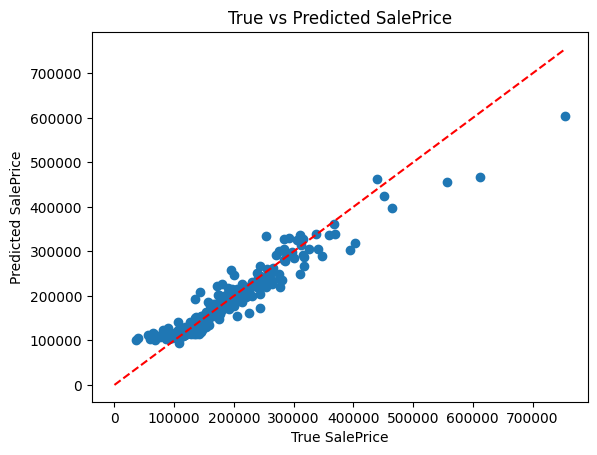

In [386]:
import matplotlib.pyplot as plt

# Plot the true vs predicted values
plt.scatter(y_test_original, y_test_pred_original)
plt.plot([0, max(y_test_original)], [0, max(y_test_original)], 'r--')
plt.xlabel('True SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('True vs Predicted SalePrice')
plt.show()